In [1]:
from hgb_maternal_disorder_paf_generation import *
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
draw = 'draw_0'
location = 'pakistan'

In [4]:
results_directory = os.getcwd() + '/'

In [5]:
get_simulated_population(location, draw)

2025-09-11 13:34:34.518 | INFO     | simulation_1-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model16.0/pakistan.hdf.
2025-09-11 13:34:34.520 | INFO     | simulation_1-artifact_manager:80 - Artifact base filter terms are ['draw == 0'].
2025-09-11 13:34:34.522 | INFO     | simulation_1-artifact_manager:81 - Artifact additional filter terms are None.
2025-09-11 13:34:57.979 | WARNING  | simulation_1-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-09-11 13:34:57.980 | WARNING  | simulation_1-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-09-11 13:34:58.190 | INFO     | simulation_1-results_manager:134 - The following stratifications are registered but not used by any observers: 
['sex']


,alive,sex,age,hemoglobin_exposure
0,alive,Female,27.686990,100.835463
1,alive,Female,16.901275,116.681960
2,alive,Female,25.907499,103.367641
3,alive,Female,27.566019,117.575350
4,alive,Female,30.891936,113.869808
...,...,...,...,...
199995,alive,Female,21.809742,90.293515
199996,alive,Female,35.677560,120.137529
199997,alive,Female,23.777497,117.214950
199998,alive,Female,25.422869,120.917007


In [6]:
# Debug: Check what get_simulated_population returns (now returns both pop and sim)
pop, sim = get_simulated_population(location, draw)
print(f"get_simulated_population returned pop: {type(pop)}, sim: {type(sim)}")
print(f"Population shape: {pop.shape}")

# Try calling load_maternal_disorders
load_maternal_disorders(location, draw)

2025-09-11 13:35:10.612 | INFO     | simulation_2-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model16.0/pakistan.hdf.
2025-09-11 13:35:10.613 | INFO     | simulation_2-artifact_manager:80 - Artifact base filter terms are ['draw == 0'].
2025-09-11 13:35:10.614 | INFO     | simulation_2-artifact_manager:81 - Artifact additional filter terms are None.


2025-09-11 13:35:30.011 | WARNING  | simulation_2-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-09-11 13:35:30.012 | WARNING  | simulation_2-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-09-11 13:35:30.220 | INFO     | simulation_2-results_manager:134 - The following stratifications are registered but not used by any observers: 
['sex']


NameError: name 'sim' is not defined

In [18]:
# great! now scaled to IV iron
calculate_and_save_iv_iron_lbwsg_shifts(results_directory, draw)
iv_iron_shifts = pd.read_csv(results_directory + f'iv_iron_lbwsg_shifts/{draw}.csv')
iv_iron_shifts

,location,sex,draw,exposure,value,outcome
0,ethiopia,Female,draw_0,40.00000,120.666797,birth_weight
1,ethiopia,Female,draw_0,40.11011,120.680757,birth_weight
2,ethiopia,Female,draw_0,40.22022,120.694748,birth_weight
3,ethiopia,Female,draw_0,40.33033,120.708760,birth_weight
4,ethiopia,Female,draw_0,40.44044,120.722778,birth_weight
...,...,...,...,...,...,...
11995,pakistan,Male,draw_0,149.55956,NaN,gestational_age
11996,pakistan,Male,draw_0,149.66967,NaN,gestational_age
11997,pakistan,Male,draw_0,149.77978,NaN,gestational_age
11998,pakistan,Male,draw_0,149.88989,NaN,gestational_age


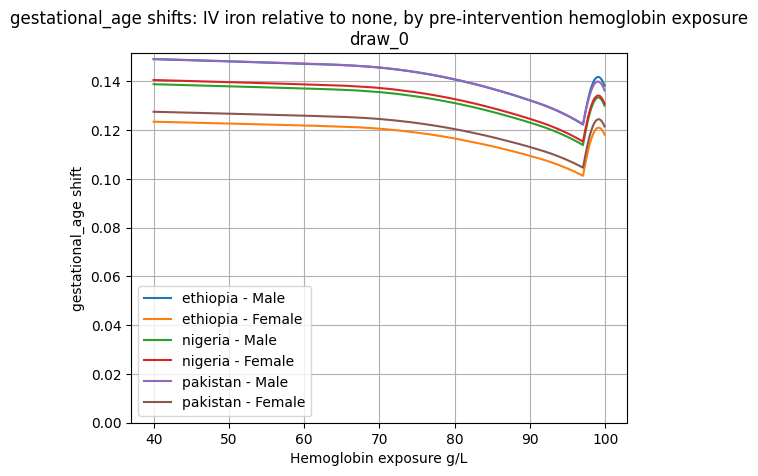

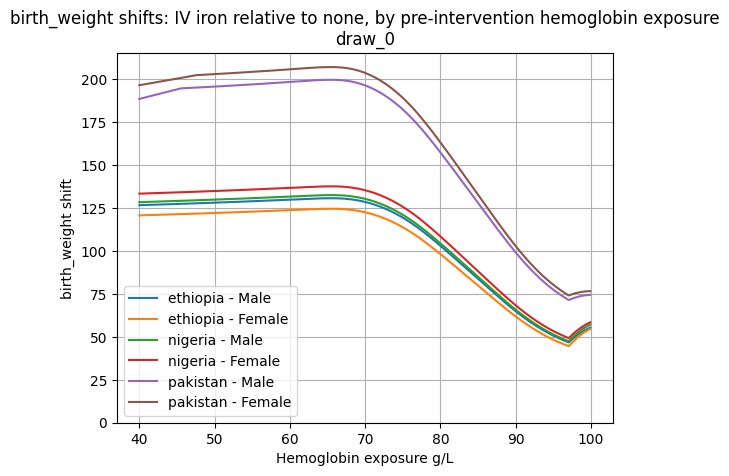

In [19]:
for outcome in ['gestational_age', 'birth_weight']:
    plt.figure()
    for location in iv_iron_shifts.location.unique():
        for sex in ['Male','Female']:
            p = iv_iron_shifts[(iv_iron_shifts.location == location) & (iv_iron_shifts.sex == sex) & (iv_iron_shifts.outcome == outcome)]
            plt.plot(p.exposure, p.value, label=f'{location} - {sex}')
    plt.title(f'{outcome} shifts: IV iron relative to none, by pre-intervention hemoglobin exposure\n{draw}')
    plt.xlabel('Hemoglobin exposure g/L')
    plt.ylabel(f'{outcome} shift')
    plt.legend()
    plt.ylim(ymin=0)
    plt.grid()

# Ok, now let's do the sepsis effects

In [3]:
total_effects = load_prepped_rrs('neonatal_sepsis')

In [22]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://artifactory.ihme.washington.edu/artifactory/api/pypi/pypi-shared/simple/
  Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [4]:
draws = [150]
results_directory = os.getcwd() 
for draw in draws:
    #calculate_and_save_lbwsg_shifts(results_directory + '/', f'draw_{draw}')
    calculate_direct_effect(results_directory, 'ethiopia', draw)

2025-08-28 12:42:31.336 | INFO     | simulation_1-artifact_manager:78 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model15.0/ethiopia.hdf.
2025-08-28 12:42:31.337 | INFO     | simulation_1-artifact_manager:79 - Artifact base filter terms are ['draw == 150'].
2025-08-28 12:42:31.338 | INFO     | simulation_1-artifact_manager:80 - Artifact additional filter terms are None.
2025-08-28 12:43:08.060 | WARNING  | simulation_1-results_manager:439 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-08-28 12:43:08.062 | WARNING  | simulation_1-results_manager:439 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-08-28 12:43:08.326 | INFO     | simulation_1-results_manager:127 - The following stratifications are registered but not used by any observers: 
['sex']


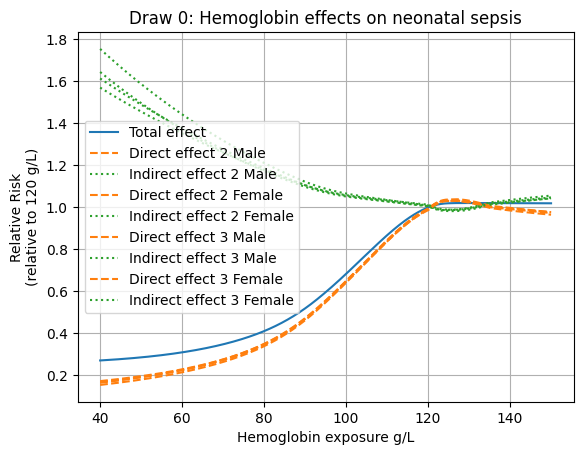

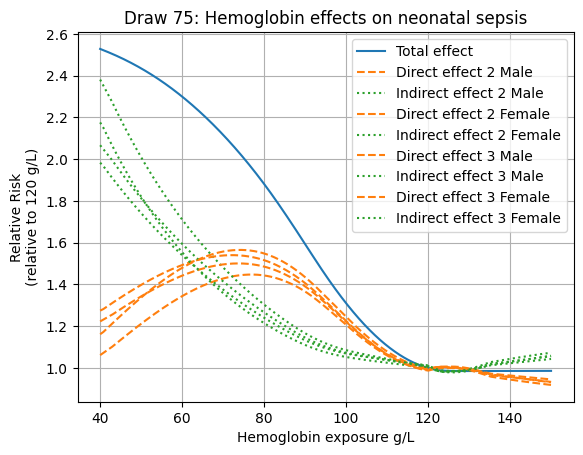

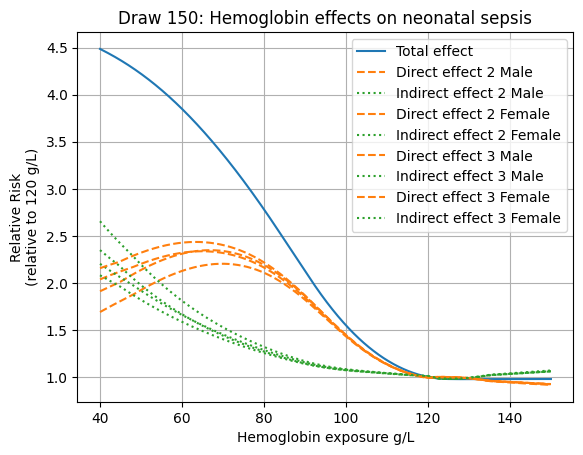

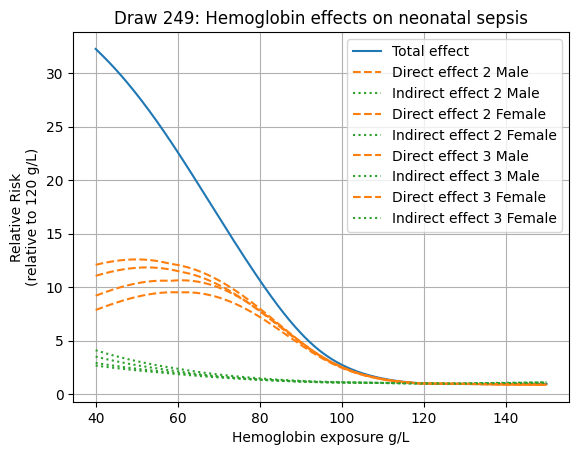

In [5]:
for draw in [0, 75, 150, 249]:
    plt.figure()
    direct_effect = pd.read_csv(os.getcwd() + f'/direct_sepsis_effects/draw_{draw}.csv')
    total_effect = total_effects[['risk',f'draw_{draw}']]
    plt.plot(total_effect['risk'], total_effect[f'draw_{draw}'], label=f'Total effect')
    for age_group_id in [2,3]:
        for sex in ['Male','Female']:
            p = direct_effect.loc[(direct_effect['age_group_id'] == age_group_id) & (direct_effect['sex_of_child'] == sex)].reset_index()
            plt.plot(p.exposure, p[f'value'], label=f'Direct effect {age_group_id} {sex}', linestyle='dashed', color='tab:orange')
            plt.plot(p.exposure, total_effect[f'draw_{draw}'] / p['value'], label=f'Indirect effect {age_group_id} {sex}', linestyle='dotted', color='tab:green')
            
    plt.legend()
    plt.grid()
    plt.title(f'Draw {draw}: Hemoglobin effects on neonatal sepsis')
    plt.xlabel('Hemoglobin exposure g/L')
    plt.ylabel('Relative Risk\n(relative to 120 g/L)')